In [1]:
import numpy as np
from scipy.special import legendre
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt
import modepy

In [2]:
p = 5
q = modepy.JacobiGaussQuadrature(0, 0, p+1)
print(q.nodes, q.weights)
qx = q.nodes
qw = q.weights

[-9.49107912e-01 -7.41531186e-01 -4.05845151e-01  3.41652293e-16
  4.05845151e-01  7.41531186e-01  9.49107912e-01] [0.12948497 0.27970539 0.38183005 0.41795918 0.38183005 0.27970539
 0.12948497]


/var/folders/6n/rm73m6jj42b58slwfg0zs84c0000gn/T/ipykernel_12729/527620796.py:2: DeprecationWarning: setting 'force_dim_axis' to 'False' is deprecated and makes 1d rules inconsistent with higher dimensions. This option will go away in 2022
  q = modepy.JacobiGaussQuadrature(0, 0, p+1)


In [ ]:
# check quadrature
q = 16
def f(x):
    return x**q

print(np.sum(qw * f(qx)))
print(2 / (q+1))

In [ ]:
# Construct the local quadrature points
qx = modepy.quadrature.jacobi_gauss.legendre_gauss_lobatto_nodes(p)

In [ ]:
plt.plot(qx, 0*qx, 'o')

In [3]:
def nlegendre(qorder):
    """Compute the Legendre with unite L2."""
    return legendre(qorder) / np.sqrt(2/(2*qorder+1))

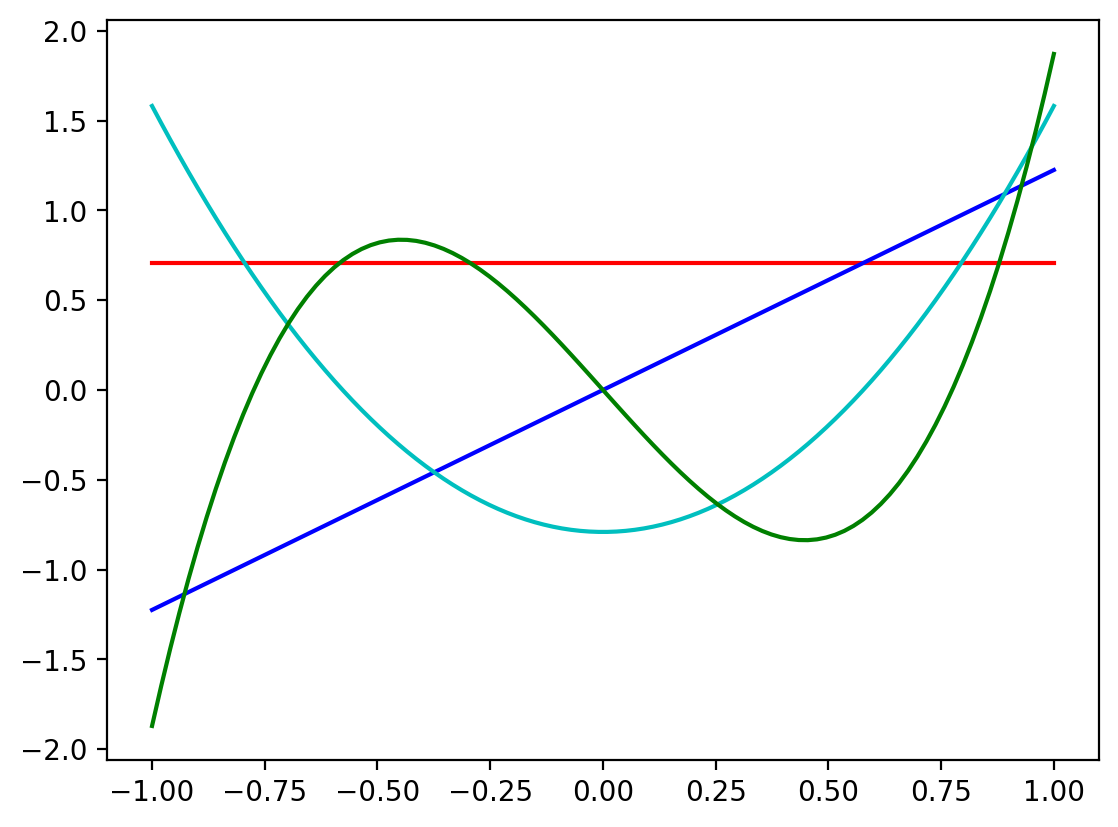

In [6]:
xx = np.linspace(-1, 1, 100)
plt.plot(xx, nlegendre(0)(xx), 'r-')
plt.plot(xx, nlegendre(1)(xx), 'b-')
plt.plot(xx, nlegendre(2)(xx), 'c-')
plt.plot(xx, nlegendre(3)(xx), 'g-')

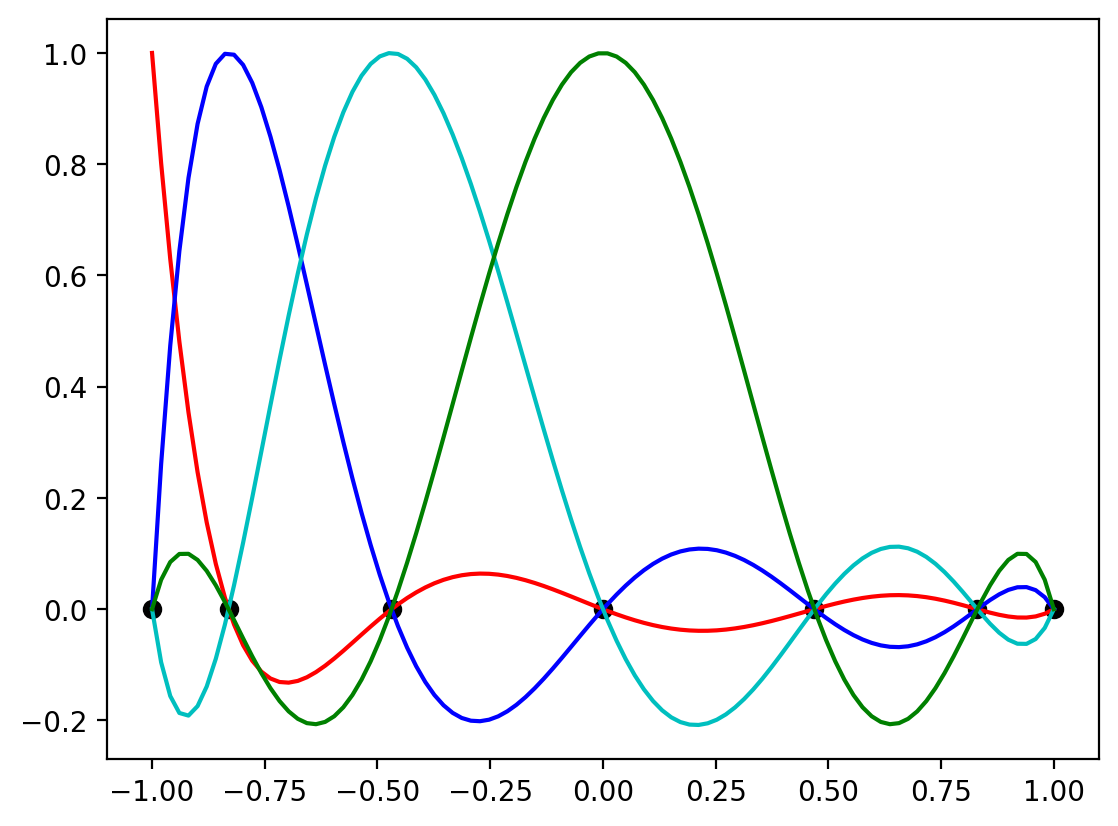

In [10]:
xx = np.linspace(-1, 1, 100)
qx = modepy.quadrature.jacobi_gauss.legendre_gauss_lobatto_nodes(6)
plt.plot(qx, 0*qx, 'ko')
u = np.zeros_like(qx); u[0] = 1
plt.plot(xx, lagrange(qx, u)(xx), 'r-')
u = np.zeros_like(qx); u[1] = 1
plt.plot(xx, lagrange(qx, u)(xx), 'b-')
u = np.zeros_like(qx); u[2] = 1
plt.plot(xx, lagrange(qx, u)(xx), 'c-')
u = np.zeros_like(qx); u[3] = 1
plt.plot(xx, lagrange(qx, u)(xx), 'g-')

In [ ]:
Lp = nlegendre(p)
dLp = Lp.deriv()

In [ ]:
xx = np.linspace(-1, 1, 100)
plt.plot(xx, dLp(xx), '-')
plt.plot(qx, 0*qx, 'ro')

In [ ]:
def f(x):
    u = np.zeros_like(x)
    u[x<=0] = 1
    return u
plt.plot(xx, f(xx), 'k-')

z = np.linspace(-1, 1, p+1)
plt.plot(xx, lagrange(z, f(z))(xx), 'r-')

z = qx
plt.plot(xx, lagrange(z, f(z))(xx), 'b-')

In [ ]:
h = 2
V = np.zeros((p+1, p+1))      # Vandermonde
dV = np.zeros((p+1, p+1))     # derivative Vandermonde
for q in range(p+1):
    poly = nlegendre(q)
    dpoly = poly.deriv()
    V[:, q] = poly(qx)
    dV[:, q] = dpoly(qx)

Vinv = np.linalg.inv(V)
M = Vinv.T @ Vinv            # Mass
Minv = (2/h) * V @ V.T       # Mass inverwse
S = M @ dV @ Vinv            # S
D = dV @ Vinv                # Derivative